# Итоговая работа.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

In [5]:
import sympy as sm

# Задание 1
Вычислите производную функции: $tg^2(sin(x) + cos(2x+3))$


в точке $x_0=1$

In [3]:
x= sm.Symbol('x')

foo1 = sm.tan(sm.sin(x) + sm.cos(2*x+3))**2

dif1 = sm.diff(foo1, x, 1)
dif1

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [4]:
sm.diff(foo1).evalf(subs={'x':1})

55.3859176353379

# Задание 2
Найдите собственные значения и собственные вектора матрицы:

In [5]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [6]:
m1 = np.linalg.eig(m)
m1

(array([ 3., -1.]), array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

# Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [13]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [14]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

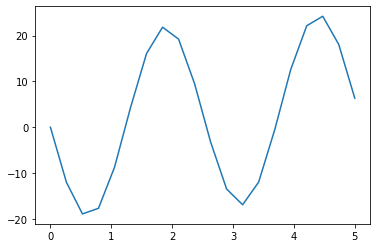

In [9]:
plt.plot(x, fx)
plt.show()

In [15]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [11]:
prm1 = [9999999]
res = ()
for i in range(10):
  for j in range(10):
    prm1.append(error((i/10,j/10)))
    if prm1[-1] < prm1[-2]:
      res1 = prm1[-1]
      res2 = ((i/10,j/10))




prm1[:4], res1, res2

([9999999, 244.50954835, 243.24746969728884, 242.29220977635356],
 240.27760775511433,
 (0.9, 0.3))

In [12]:
f1 = f(x,res2[0],res2[1])

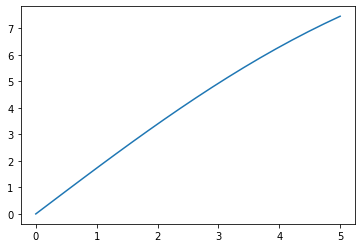

In [13]:
plt.plot(x, f1)
plt.show()

In [14]:
from scipy.optimize import curve_fit

res = curve_fit(f, x, fx, p0=[2,2], method='lm')

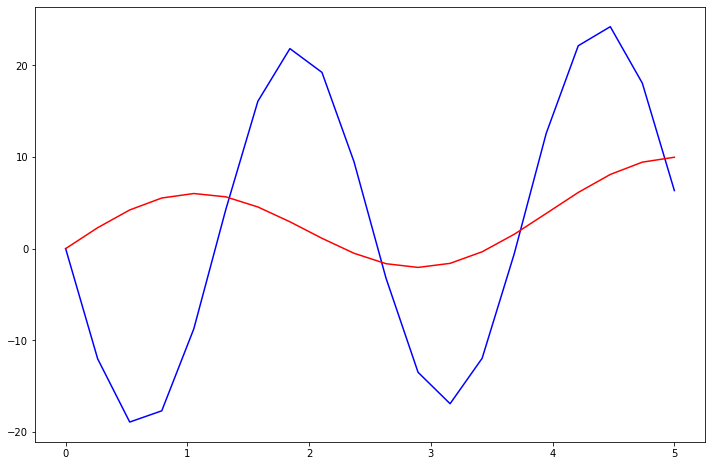

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(x, fx, color='blue')
plt.plot(x, f(x, res[0][0], res[0][1]), color='red')
plt.show()

# Задание 4
Часто в реальных задачах случается ситуация, когда необходимо понять, какое распределение и с какими параметрами лучшим образом описывает данные. Ведь поняв, что некоторая метрика хорошо описывается, например, нормальным распределением с параметрами 3 и 8.5 мы можем для быстрых визуализаций и экспериментов хранить всего 2 числа - параметра распределения и название самого распределения вместо гигабайтов самих данных.

In [6]:
x = np.linspace(-30, 30, 300)
y = [11.642,  9.467,  8.227, 10.372,  8.768,  9.544,  8.202, 10.106,
       10.664, 11.03 , 12.673, 10.445, 12.096, 15.562, 10.55 , 10.81 ,
        8.833, 12.087, 10.463,  9.149,  8.633, 12.233, 10.815, 11.346,
        4.863, 11.602,  9.997, 10.578,  9.097,  8.414, 11.852, 14.262,
        8.527,  5.725,  6.567, 10.767,  4.84 ,  3.433, 11.152, 10.613,
       13.44 ,  7.327,  9.3  , 11.303, 10.732, 10.334, 16.763,  8.541,
       16.307, 10.787, 10.362,  8.362, 11.78 , 13.002,  8.413,  9.334,
       11.631, 11.935,  7.433, 13.87 ,  8.825, 11.377,  6.38 , 11.774,
       13.307,  8.946, 10.171, 11.951,  7.612, 12.916,  6.851,  6.713,
        8.817,  9.485,  9.07 , 10.886, 11.193, 11.707, 10.121, 13.486,
       13.641,  7.749,  6.928, 12.619,  9.498, 10.032,  8.561, 12.907,
       18.546, 10.533, 10.127,  8.875,  9.462, 10.296, 15.635,  9.33 ,
        5.883,  6.671, 11.746, 13.132,  5.702, 12.136,  8.054, 10.632,
       12.995, 10.931, 12.841,  9.757,  9.558, 11.962,  9.997,  8.256,
       14.05 , 11.056,  4.397, 15.013, 10.908,  5.036, 14.101, 11.065,
        6.535,  9.017,  9.327,  8.357, 12.342, 10.808, 10.387,  8.018,
        7.879,  7.686,  5.364, 10.494,  5.518, 13.415,  7.873,  9.122,
       11.167,  7.197, 15.408, 10.881, 11.821, 10.617, 11.34 , 13.319,
       11.407,  7.642, 10.962, 11.6  , 11.243,  6.225, 12.527,  7.485,
        6.367,  5.218,  8.957, 11.71 , 13.981, 11.627, 11.292, 11.07 ,
        7.632, 11.931, 11.732, 10.35 , 14.874, 10.067,  6.804, 12.953,
        9.68 , 10.531,  7.245,  6.795, 14.585,  7.385, 17.949, 13.315,
       11.558,  9.921,  9.27 , 13.003, 11.817,  7.785, 12.956, 11.09 ,
       15.251, 13.163, 10.076, 12.429,  5.511,  8.672,  2.814,  8.762,
       12.139, 10.646, 11.607,  6.45 ,  3.825, 10.043, 10.562,  8.066,
       11.735,  5.764,  8.254, 10.533, 13.903, 12.375, 11.112, 15.186,
       11.619, 12.749,  8.023,  8.477, 10.303,  6.821, 13.099,  7.954,
       10.672,  7.655,  3.747, 14.4  , 10.428,  6.976,  8.336, 13.423,
        7.458, 13.031, 11.287,  9.101, 10.941, 17.224, 10.406, 10.363,
       16.617, 11.836, 12.659, 12.633, 14.962,  6.785,  5.254,  4.079,
       12.576, 12.682, 12.992, 10.544, 11.365,  7.373, 14.686,  7.201,
       14.893, 12.19 ,  9.647,  9.463, 11.616,  7.891,  8.553,  8.555,
        5.347, 11.246, 15.385,  8.883, 11.999, 10.675,  8.107, 12.795,
       13.337,  9.084, 11.664, 11.509,  8.589, 14.145, 10.385, 16.605,
        6.097,  6.718, 11.883,  5.8  ,  8.964,  8.118, 10.759, 13.492,
        9.573, 12.696, 10.075, 11.065, 14.588,  6.215, 13.786,  7.367,
       12.094, 10.403, 10.923, 13.554, 11.057,  8.593, 16.848,  7.137,
        8.549,  8.899, 11.641, 12.491]

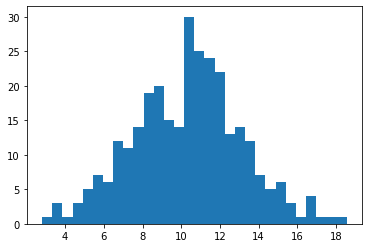

In [17]:
plt.hist(y, bins=30)
plt.show()

В библиотеке [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) есть список непрерывных распределений и у каждого из них есть метод fit(data), позволяющий найти наилучшие параметры распределения по данным. Вам необходимо выбрать подходящее, на ваш взгляд, распределение и найти к нему оптимальные параметры с помощью метода fit(y).

In [7]:
import scipy.stats as st

In [8]:
rasp = {'alpha': st.alpha.fit(y), 
 'anglit': st.anglit.fit(y),
 'burr12': st.burr12.fit(y),
 'argus': st.argus.fit(y),
 'chi': st.chi.fit(y),
 'betaprime': st.betaprime.fit(y),
 'chi2': st.chi2.fit(y),
 'burr': st.burr.fit(y),
 'norm': st.norm.fit(y)
 }
 

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:708: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:712: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),


In [ ]:
rasp

{'alpha': (20.289746893162842, -46.70050961518777, 1155.0837012935472),
 'anglit': (10.64787129557909, 10.1578993020383),
 'argus': (3.3467852021060506e-05, 1.8664910003750714, 16.69924628279027),
 'betaprime': (281.6995798820891,
  12856.574235568813,
  -36.13415404974745,
  2121.1548727615846),
 'burr': (10.334217245590226,
  0.3526088353448459,
  0.20101348576080885,
  12.220432596614817),
 'burr12': (4.5782631165759415,
  6.368093347639018,
  -0.13379158596110174,
  16.819689285646167),
 'chi': (133.79009347419927, -35.2862858994888, 3.951772348895469),
 'chi2': (186.4802964864282, -17.075880353798, 0.14703368111441706),
 'norm': (10.343879999999999, 2.7925380055187548)}

# Задание 5
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [9]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [21]:
def angg(a,b):
  return np.rad2deg(np.arccos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))))

res = 99999
a,b = 0,0


for i in range(len(raitings)):
  for j in range(len(raitings)):
    if i != j:
      angg(raitings[i],raitings[j]) < res
      res = angg(raitings[i],raitings[j])
      a,b = raitings[i],raitings[j]
  print(a,b) 
  


[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[6 1 9 7 7 9 2 3 5 1 6 6 3 2 7] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [2]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Text(0, 0.5, 'MSE')

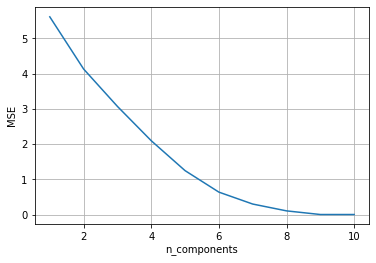

In [10]:
m = []
n = []

for i in range(1,11):
    m.append(i)
    
    pca = PCA(n_components=i)
    pca.fit(raitings)
    
    X2 = pca.transform(raitings)
    X3 = pca.inverse_transform(X2)
    
    k = mean_squared_error(raitings, X3)
    n.append(k)

plt.plot(m,n)
plt.grid(True)
plt.xlabel("n_components")
plt.ylabel("MSE")



In [54]:
p1 = PCA(n_components=5)
p1.fit(raitings)

p1.explained_variance_ratio_, p1.singular_values_


(array([0.25373748, 0.1970209 , 0.14113306, 0.12956371, 0.11289928]),
 array([16.91716582, 14.90704109, 12.61681323, 12.08862725, 11.28446283]))

In [55]:
p1.fit_transform(X)

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

In [42]:
def PCA1(X , num_components):
    
    
    X_meaned = X - np.mean(X , axis = 0)
    
    
    cov_mat = np.cov(X_meaned , rowvar = False)
    
    
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    
    
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    
    
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    
    return X_reduced


X = raitings

PCA1(X,5)

array([[ 5.30986101,  1.92919845, -4.93300027,  2.70188013, -5.50497886],
       [-2.87763403,  2.71659559,  1.40592782,  7.26325751,  4.50322291],
       [ 4.94010408, -6.68861167, -0.94550184,  3.61556661,  0.68969272],
       [-5.14939908, -6.28027284, -4.65978558,  1.09024004,  1.01471112],
       [ 1.37488691,  7.54357985,  4.00834369,  2.1284001 ,  0.16324949],
       [-2.65341956, -3.77075601,  8.58430748, -1.46628319, -1.67401769],
       [-8.61573944,  3.78603335, -4.02721027, -4.37582577,  3.13880277],
       [-5.39658258, -1.0170466 ,  1.01456742, -1.89512837, -6.54883538],
       [ 5.7843488 ,  5.29857107, -1.48083611, -3.71295542, -0.21312695],
       [ 7.2835739 , -3.51729118,  1.03318766, -5.34915166,  4.43127987]])

Добрый день, Алексей!

Большое спасибо за проделанную над итоговым заданием работу!

Вы выполнили:

Задание 1 - Верно!

Задание 2 - Верно!

Задание 3 - Это довольно приближённый вариант вычисления, получится крайне большая ошибка; для решения задания можно было использовать differential_evolution() или minimize().

Задание 4 - Верно! Правда лучше было одно -norm.fit(y) и визуализировать.

Задание 5 - В пункте a, направление было верным, только требовалось искать минимальное “расстояние” в рамках каждого пользователя, ну и косинусную метрику не обязательно было приводить у самому углу, для удобства и краткости решения можно было использовать, например, функцию pairwise_distances() и пройтись в цикле с поиском минимального ненулевого для каждого пользователя; в пункте b выполнено верно, хотя достаточно было p1.fit_transform(X).

Поздравляю с завершением курса!


Работа зачтена.

Если остались вопросы, с удовольствием отвечу на них в личных сообщениях.

Успехов в дальнейшем обучении!

# Пример реализации 3 задания:

In [25]:
from scipy.optimize import minimize

res = minimize(error, [0,0], method='COBYLA')
np.around(res.x,2)


array([ 3. , -2.5])

In [17]:
from scipy.optimize import differential_evolution

bounds = [(-5, 5), (-25, 25)]

result = differential_evolution(error, bounds)
result.x

array([1.95260122, 1.56637942])

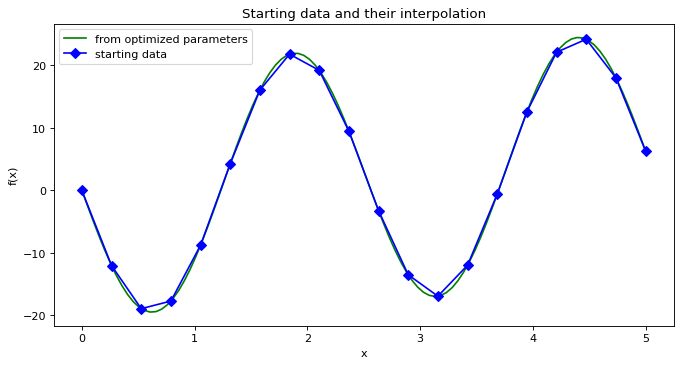

In [26]:
fig = plt.figure(figsize=(10, 5), dpi=80)
ax = fig.add_subplot(111)
x_plot = np.linspace(0, 5, 100)
ax_1 = ax.plot(
    x_plot, f(x_plot, *res.x),
    color='green',
    label='from optimized parameters'
)
ax_2 = ax.plot(
    x, fx,
    marker='D',
    color='blue',
    label='starting data'
)
xl = ax.set_xlabel('x')
yl = ax.set_ylabel('f(x)')
l = ax.legend()
t = plt.title('Starting data and their interpolation')

# Пример реализации 4 задания (с графиком):

Параметры нормального распределения по нашим данным:  (10.343879999999999, 2.7925380055187548) 



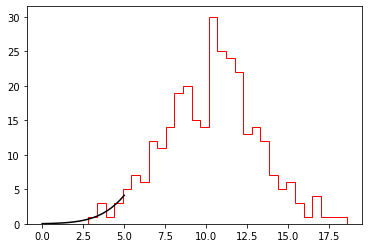

In [28]:
norm_fit_res = norm.fit(y)        # Обучение нормального распределения
scale = 180                       # Коэффициент масштабирования
print('Параметры нормального распределения по нашим данным: ', norm_fit_res, '\n')

scaled_norm = norm.pdf(x, norm_fit_res[0], norm_fit_res[1]) * scale

plt.hist(y, bins=30, color='red', histtype='step')
plt.plot(x, scaled_norm, color='black')
plt.show()

# Пример реализации 5 задания, части а (краткий вариант и сразу с индексами пользователей):

In [29]:
from sklearn.metrics import pairwise_distances

for i, vector in enumerate(pairwise_distances(raitings, metric="cosine")):
    print(i, list(vector).index(np.min(vector[np.nonzero(vector)])))

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2
